In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
arctic = pd.read_csv('arctic-ice.csv')
arctic_area = pd.merge(arctic['year'], arctic.iloc[:, -1], on = arctic.index)

In [3]:
sea = pd.read_csv('sea-level.csv')
sea = sea.drop(sea.iloc[:, -4:], axis = 1)

In [4]:
sea = sea.drop(["0", '11', '452600', '327401.31', '-38.59', '89.86'], axis = 1)

In [5]:
sea.columns = ['Year', 'Level Rise']

In [6]:
for i in range(len(sea['Year'])):
    sea['Year'].values[i] = round(sea['Year'].values[i])
    sea['Level Rise'].values[i] = float(sea['Level Rise'].values[i])

In [7]:
sea

,Year,Level Rise
0,1993.0,-39.78
1,1993.0,-39.62
2,1993.0,-39.67
3,1993.0,-38.75
4,1993.0,-37.71
...,...,...
1040,2021.0,49.99
1041,2021.0,49.97
1042,2021.0,49.94
1043,2021.0,49.92


In [8]:
sea = sea.groupby(['Year']).sum()

In [9]:
for i in range(len(sea.index)):
    sea['Level Rise'].values[i] = sea['Level Rise'].values[i]/36

In [10]:
sea

,Level Rise
Year,
1993.0,-17.699444
1994.0,-33.567222
1995.0,-29.946667
1996.0,-28.611111
1997.0,-25.898333
1998.0,-21.336389
1999.0,-25.261667
2000.0,-20.514444
2001.0,-16.725000


In [11]:
arctic_area.index = arctic_area['year']

In [12]:
arctic_area = arctic_area.drop(['key_0', 'year'], axis = 1)

In [13]:
arctic_area

,area
year,
1979,4.58
1980,4.87
1981,4.44
1982,4.43
1983,4.70
1984,4.11
1985,4.23
1986,4.72
1987,5.64


In [14]:
temp = pd.read_csv('land-ocean-temp.csv')

In [15]:
temp = temp.drop('-0.09', axis = 1)

In [16]:
temp.columns = ['Year', 'Temperature Inc']

In [17]:
for i in range(len(temp.index)):
    temp['Year'].values[i] = int(temp['Year'].values[i])
    temp['Temperature Inc'].values[i] = float(temp['Temperature Inc'].values[i])

In [18]:
temp.index = temp['Year']

In [19]:
carbon = pd.read_csv('carbon-emissions.csv')

In [20]:
carbon.columns = ['Year', 'Emission']

In [21]:
for i in range(len(carbon.index)):
    carbon['Year'].values[i] = int(carbon['Year'].values[i])
    carbon['Emission'].values[i] = float(carbon['Emission'].values[i])

In [22]:
carbon = carbon.groupby(['Year']).sum()

In [23]:
carbon

,Emission
Year,
1958,2838.49
1959,3791.73
1960,3802.89
1961,3811.69
1962,3821.38
...,...
2017,4881.09
2018,4904.59
2019,4939.87


In [24]:
for i in range(1, 63):
    carbon['Emission'].values[i] = carbon['Emission'].values[i]/12

In [25]:
carbon

,Emission
Year,
1958,2838.490000
1959,315.977500
1960,316.907500
1961,317.640833
1962,318.448333
...,...
2017,406.757500
2018,408.715833
2019,411.655833


In [26]:
carbon.iloc[0, :] = 315.29
carbon.iloc[63, :] = carbon.iloc[63, :]/8

In [27]:
carbon

,Emission
Year,
1958,315.290000
1959,315.977500
1960,316.907500
1961,317.640833
1962,318.448333
...,...
2017,406.757500
2018,408.715833
2019,411.655833


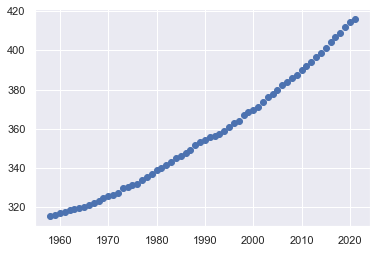

In [28]:
plt.scatter(carbon.index, carbon)

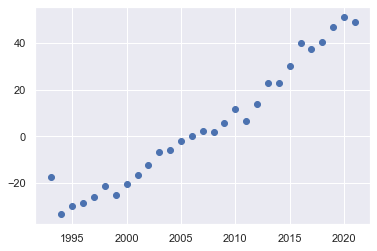

In [29]:
plt.scatter(sea.index, sea)

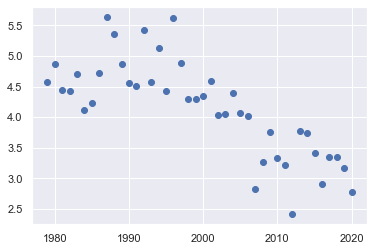

In [30]:
plt.scatter(arctic_area.index, arctic_area)

In [31]:
temp = temp.drop('Year', axis = 1)

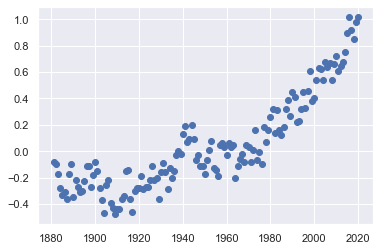

In [32]:
plt.scatter(temp.index, temp)

In [33]:
sea.index = sea.index.astype(np.int64)

In [34]:
sea

,Level Rise
1993,-17.699444
1994,-33.567222
1995,-29.946667
1996,-28.611111
1997,-25.898333
1998,-21.336389
1999,-25.261667
2000,-20.514444
2001,-16.725000
2002,-12.191944


In [35]:
arctic_area_1 = arctic_area.iloc[14:, :]

In [36]:
arctic_area_1

,area
year,
1993,4.58
1994,5.13
1995,4.43
1996,5.62
1997,4.89
1998,4.30
1999,4.29
2000,4.35
2001,4.59


In [37]:
sea

,Level Rise
1993,-17.699444
1994,-33.567222
1995,-29.946667
1996,-28.611111
1997,-25.898333
1998,-21.336389
1999,-25.261667
2000,-20.514444
2001,-16.725000
2002,-12.191944


In [38]:
temp_1 = temp.iloc[112:, :]

In [39]:
carbon_1 = carbon.iloc[35:, :]

In [40]:
carbon_1

,Emission
Year,
1993,357.214167
1994,358.959167
1995,360.967500
1996,362.743333
1997,363.876667
1998,366.839167
1999,368.540833
2000,369.706667
2001,371.318333


In [41]:
sea_carb = pd.merge(sea, carbon_1, on = sea.index)
temp_arctic = pd.merge(temp_1, arctic_area_1, on = temp_1.index)

In [42]:
df_1 = pd.merge(sea_carb.drop(28), temp_arctic, on = temp_arctic.index)

In [43]:
df_1 = df_1.drop(['key_0', 'key_0_x'], axis = 1)

In [44]:
df_1.columns = ['Level_Rise', 'Emissions', 'Year', 'Temp_Inc', 'Arctic_Area']

In [45]:
df_1.index = df_1['Year']

In [46]:
df_1 = df_1.drop('Year', axis = 1)

In [47]:
df_1

,Level_Rise,Emissions,Temp_Inc,Arctic_Area
Year,,,,
1993,-17.699444,357.214167,0.23,4.58
1994,-33.567222,358.959167,0.32,5.13
1995,-29.946667,360.967500,0.45,4.43
1996,-28.611111,362.743333,0.33,5.62
1997,-25.898333,363.876667,0.46,4.89
1998,-21.336389,366.839167,0.61,4.30
1999,-25.261667,368.540833,0.38,4.29
2000,-20.514444,369.706667,0.40,4.35
2001,-16.725000,371.318333,0.54,4.59


In [48]:
corrMatrix = df_1.corr()
print (corrMatrix)

             Level_Rise  Emissions  Temp_Inc  Arctic_Area
Level_Rise     1.000000   0.983331  0.922736    -0.796453
Emissions      0.983331   1.000000  0.921715    -0.820946
Temp_Inc       0.922736   0.921715  1.000000    -0.757865
Arctic_Area   -0.796453  -0.820946 -0.757865     1.000000


In [49]:
import statsmodels.api as sm
df_1 = sm.add_constant(df_1)

In [50]:
import statsmodels.formula.api as smf
mod1 = smf.ols('Level_Rise ~ const + Emissions + Temp_Inc + Arctic_Area', data = df_1) 
res = mod1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Level_Rise   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     250.8
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           3.02e-18
Time:                        19:35:25   Log-Likelihood:                -81.108
No. Observations:                  28   AIC:                             170.2
Df Residuals:                      24   BIC:                             175.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -262.7520     29.560     -8.889      0.000    -323.760    -201.744
const        -262.7520     29.560     -8.889      0.000    -323.760    -201.744
Emissions       1.3445      0.156      8.610      0.000       1.022       1.667
Temp_Inc       13.0954     11.098      1.180      0.250      -9.810      36.001
Arctic_Area     1.1169      2.092      0.534      0.598      -3.201       5.435
==============================================================================
Omnibus:                       43.396   Durbin-Watson:                   1.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.547
Skew:                           2.987   Prob(JB):                     8.44e-41
Kurtosis:                      14.067   Cond. No.                     1.23e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.74e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
import statsmodels.formula.api as smf
mod1 = smf.ols('Level_Rise ~ const + Emissions', data = df_1) 
res = mod1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Level_Rise   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     760.5
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           8.87e-21
Time:                        19:35:25   Log-Likelihood:                -82.050
No. Observations:                  28   AIC:                             168.1
Df Residuals:                      26   BIC:                             170.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -277.1484     10.116    -27.397      0.000    -297.942    -256.355
const       -277.1484     10.116    -27.397      0.000    -297.942    -256.355
Emissions      1.4524      0.053     27.577      0.000       1.344       1.561
==============================================================================
Omnibus:                       27.312   Durbin-Watson:                   1.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.917
Skew:                           1.917   Prob(JB):                     2.18e-14
Kurtosis:                       9.264   Cond. No.                     1.38e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.18e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [52]:
mod1 = smf.ols('Level_Rise ~ const + Arctic_Area', data = df_1) 
res = mod1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Level_Rise   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     45.10
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           3.99e-07
Time:                        19:35:25   Log-Likelihood:                -115.70
No. Observations:                  28   AIC:                             235.4
Df Residuals:                      26   BIC:                             238.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      52.6909      7.758      6.792      0.000      36.744      68.638
const          52.6909      7.758      6.792      0.000      36.744      68.638
Arctic_Area   -26.5140      3.948     -6.716      0.000     -34.629     -18.399
==============================================================================
Omnibus:                        1.697   Durbin-Watson:                   0.923
Prob(Omnibus):                  0.428   Jarque-Bera (JB):                1.032
Skew:                          -0.010   Prob(JB):                        0.597
Kurtosis:                       2.060   Cond. No.                     4.91e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.02e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [53]:
mod1 = smf.ols('Level_Rise ~ const + Temp_Inc', data = df_1) 
res = mod1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Level_Rise   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     149.0
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           2.87e-12
Time:                        19:35:25   Log-Likelihood:                -103.09
No. Observations:                  28   AIC:                             210.2
Df Residuals:                      26   BIC:                             212.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.6386      3.032    -11.094      0.000     -39.871     -27.406
const        -33.6386      3.032    -11.094      0.000     -39.871     -27.406
Temp_Inc     110.6823      9.067     12.207      0.000      92.045     129.320
==============================================================================
Omnibus:                        0.720   Durbin-Watson:                   1.163
Prob(Omnibus):                  0.698   Jarque-Bera (JB):                0.143
Skew:                           0.149   Prob(JB):                        0.931
Kurtosis:                       3.183   Cond. No.                     3.90e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.44e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [54]:
mod1 = smf.ols('Temp_Inc ~ const + Emissions', data = df_1) 
res = mod1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Temp_Inc   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     146.8
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           3.38e-12
Time:                        19:35:25   Log-Likelihood:                 30.774
No. Observations:                  28   AIC:                            -57.55
Df Residuals:                      26   BIC:                            -54.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8599      0.180    -10.339      0.000      -2.230      -1.490
const         -1.8599      0.180    -10.339      0.000      -2.230      -1.490
Emissions      0.0113      0.001     12.117      0.000       0.009       0.013
==============================================================================
Omnibus:                        1.891   Durbin-Watson:                   1.552
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                1.199
Skew:                           0.199   Prob(JB):                        0.549
Kurtosis:                       2.068   Cond. No.                     1.38e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.18e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [55]:
mod1 = smf.ols('Arctic_Area ~ const + Emissions + Temp_Inc', data = df_1) 
res = mod1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Arctic_Area   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     25.84
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           8.24e-07
Time:                        19:35:25   Log-Likelihood:                -15.945
No. Observations:                  28   AIC:                             37.89
Df Residuals:                      25   BIC:                             41.89
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8653      2.200      4.029      0.000       4.334      13.397
const          8.8653      2.200      4.029      0.000       4.334      13.397
Emissions     -0.0361      0.013     -2.764      0.011      -0.063      -0.009
Temp_Inc      -0.0284      1.061     -0.027      0.979      -2.213       2.156
==============================================================================
Omnibus:                        4.106   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                2.459
Skew:                          -0.550   Prob(JB):                        0.292
Kurtosis:                       3.948   Cond. No.                     1.48e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.88e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [56]:
mod1 = smf.ols('Arctic_Area ~ const + Emissions', data = df_1) 
res = mod1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Arctic_Area   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     53.74
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           8.74e-08
Time:                        19:35:25   Log-Likelihood:                -15.945
No. Observations:                  28   AIC:                             35.89
Df Residuals:                      26   BIC:                             38.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9182      0.954      9.345      0.000       6.957      10.880
const          8.9182      0.954      9.345      0.000       6.957      10.880
Emissions     -0.0364      0.005     -7.331      0.000      -0.047      -0.026
==============================================================================
Omnibus:                        4.043   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                2.407
Skew:                          -0.541   Prob(JB):                        0.300
Kurtosis:                       3.944   Cond. No.                     1.38e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.18e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
mod1 = smf.ols('Arctic_Area ~ const + Temp_Inc', data = df_1) 
res = mod1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Arctic_Area   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     35.08
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           3.00e-06
Time:                        19:35:25   Log-Likelihood:                -19.677
No. Observations:                  28   AIC:                             43.35
Df Residuals:                      26   BIC:                             46.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7971      0.154     18.143      0.000       2.480       3.114
const          2.7971      0.154     18.143      0.000       2.480       3.114
Temp_Inc      -2.7307      0.461     -5.923      0.000      -3.678      -1.783
==============================================================================
Omnibus:                        8.401   Durbin-Watson:                   1.139
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                6.561
Skew:                          -1.049   Prob(JB):                       0.0376
Kurtosis:                       4.105   Cond. No.                     3.90e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.44e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

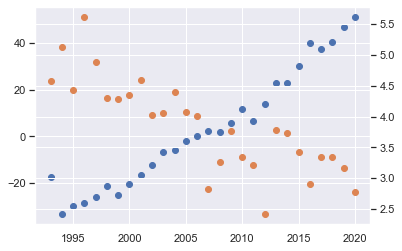

In [58]:
fig, ax1 = plt.subplots() 
ax1.scatter(df_1.index, df_1['Level_Rise'])
ax2 = ax1.twinx()
ax2.scatter(df_1.index, df_1['Arctic_Area'], c = 'C1')

In [59]:
a_1, b_1 = np.polyfit(df_1['Emissions'], df_1['Level_Rise'], deg = 1)
a_2, b_2 = np.polyfit(df_1['Emissions'], df_1['Temp_Inc'], deg = 1)
a_3, b_3 = np.polyfit(df_1['Emissions'], df_1['Arctic_Area'], deg = 1)

In [60]:
gdp = pd.read_csv('GDP.csv')

In [61]:
gdp = gdp.transpose()

In [62]:
gdp = gdp.drop('Country Name')

In [63]:
gdp_1 = gdp.iloc[33:, :]

In [64]:
for i in range(len(gdp.index)):
    gdp.index.values[i] = int(gdp.index.values[i])

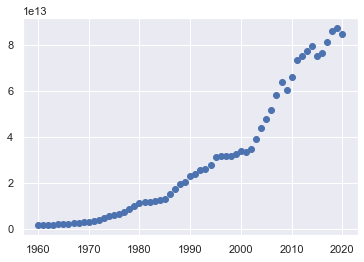

In [65]:
plt.scatter(gdp.index, gdp)

In [66]:
df_2 = pd.merge(df_1, gdp_1, on = df_1.index)

In [67]:
df_2.columns = ['Year', 'Const', 'Level_Rise', 'Emissions', 'Temp_Inc', 'Arctic_Area', 'GDP']

In [68]:
df_2.index = df_2['Year']
df_2 = df_2.drop('Year', axis = 1)

In [69]:
df_2

,Const,Level_Rise,Emissions,Temp_Inc,Arctic_Area,GDP
Year,,,,,,
1993,1.0,-17.699444,357.214167,0.23,4.58,2.5832e+13
1994,1.0,-33.567222,358.959167,0.32,5.13,2.78339e+13
1995,1.0,-29.946667,360.967500,0.45,4.43,3.09541e+13
1996,1.0,-28.611111,362.743333,0.33,5.62,3.163e+13
1997,1.0,-25.898333,363.876667,0.46,4.89,3.15125e+13
1998,1.0,-21.336389,366.839167,0.61,4.30,3.14398e+13
1999,1.0,-25.261667,368.540833,0.38,4.29,3.2629e+13
2000,1.0,-20.514444,369.706667,0.40,4.35,3.37035e+13
2001,1.0,-16.725000,371.318333,0.54,4.59,3.34899e+13


In [70]:
df_2['GDP'].values[-4] = float(df_2['GDP'].values[-4])

In [71]:
df_2

,Const,Level_Rise,Emissions,Temp_Inc,Arctic_Area,GDP
Year,,,,,,
1993,1.0,-17.699444,357.214167,0.23,4.58,2.5832e+13
1994,1.0,-33.567222,358.959167,0.32,5.13,2.78339e+13
1995,1.0,-29.946667,360.967500,0.45,4.43,3.09541e+13
1996,1.0,-28.611111,362.743333,0.33,5.62,3.163e+13
1997,1.0,-25.898333,363.876667,0.46,4.89,3.15125e+13
1998,1.0,-21.336389,366.839167,0.61,4.30,3.14398e+13
1999,1.0,-25.261667,368.540833,0.38,4.29,3.2629e+13
2000,1.0,-20.514444,369.706667,0.40,4.35,3.37035e+13
2001,1.0,-16.725000,371.318333,0.54,4.59,3.34899e+13


In [72]:
for i in range(len(df_2.index)):
    df_2['GDP'].values[i] = df_2['GDP'].values[i]/10000000000000

In [73]:
df_2

,Const,Level_Rise,Emissions,Temp_Inc,Arctic_Area,GDP
Year,,,,,,
1993,1.0,-17.699444,357.214167,0.23,4.58,2.5832
1994,1.0,-33.567222,358.959167,0.32,5.13,2.78339
1995,1.0,-29.946667,360.967500,0.45,4.43,3.09541
1996,1.0,-28.611111,362.743333,0.33,5.62,3.163
1997,1.0,-25.898333,363.876667,0.46,4.89,3.15125
1998,1.0,-21.336389,366.839167,0.61,4.30,3.14398
1999,1.0,-25.261667,368.540833,0.38,4.29,3.2629
2000,1.0,-20.514444,369.706667,0.40,4.35,3.37035
2001,1.0,-16.725000,371.318333,0.54,4.59,3.34899


In [74]:
df_2['Emissions'] = df_2['Emissions'].tolist()

In [75]:
df_2

,Const,Level_Rise,Emissions,Temp_Inc,Arctic_Area,GDP
Year,,,,,,
1993,1.0,-17.699444,357.214167,0.23,4.58,2.5832
1994,1.0,-33.567222,358.959167,0.32,5.13,2.78339
1995,1.0,-29.946667,360.967500,0.45,4.43,3.09541
1996,1.0,-28.611111,362.743333,0.33,5.62,3.163
1997,1.0,-25.898333,363.876667,0.46,4.89,3.15125
1998,1.0,-21.336389,366.839167,0.61,4.30,3.14398
1999,1.0,-25.261667,368.540833,0.38,4.29,3.2629
2000,1.0,-20.514444,369.706667,0.40,4.35,3.37035
2001,1.0,-16.725000,371.318333,0.54,4.59,3.34899


In [76]:
for i in range(len(df_2.index)):
    df_2['GDP'].values[i] = np.float64(df_2['GDP'].values[i])

In [77]:
df_2['GDP'] = pd.to_numeric(df_2['GDP'])

In [78]:
mod = smf.ols('Emissions ~ Const + GDP', data = df_2)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Emissions   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     525.2
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           9.07e-19
Time:                        19:35:26   Log-Likelihood:                -76.106
No. Observations:                  28   AIC:                             156.2
Df Residuals:                      26   BIC:                             158.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    170.5239      0.999    170.724      0.000     168.471     172.577
Const        170.5239      0.999    170.724      0.000     168.471     172.577
GDP            7.7649      0.339     22.917      0.000       7.068       8.461
==============================================================================
Omnibus:                        3.182   Durbin-Watson:                   0.400
Prob(Omnibus):                  0.204   Jarque-Bera (JB):                1.395
Skew:                           0.044   Prob(JB):                        0.498
Kurtosis:                       1.910   Cond. No.                     6.16e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.69e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

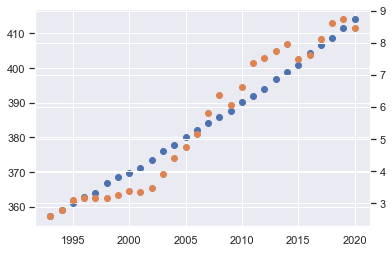

In [79]:
fig, ax1 = plt.subplots() 
ax1.scatter(df_2.index, df_2['Emissions'])
ax2 = ax1.twinx()
ax2.scatter(df_2.index, df_2['GDP'], c = 'C1')

In [80]:
a4, b4 = np.polyfit(df_2['GDP'], df_2['Emissions'], deg = 1)
a4, b4

(7.764871616618571, 341.04780212142873)

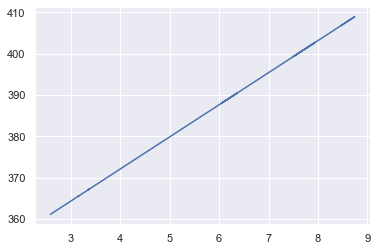

In [81]:
plt.plot(df_2['GDP'], a4 * df_2['GDP'] + b4)

In [82]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [83]:
scaled_df_2 = pd.DataFrame(scale.fit_transform(df_2.iloc[:, 1:]))
scaled_df_2.columns = df_2.columns.values[1:]

In [84]:
scaled_df_2

,Level_Rise,Emissions,Temp_Inc,Arctic_Area,GDP
0,-0.833650,-1.572643,-1.951925,0.963752,-1.374899
1,-1.470091,-1.469264,-1.518927,1.698131,-1.280555
2,-1.324874,-1.350285,-0.893487,0.763467,-1.133512
3,-1.271306,-1.245080,-1.470816,2.352395,-1.101661
4,-1.162499,-1.177938,-0.845376,1.377675,-1.107198
5,-0.979524,-1.002431,-0.123714,0.589887,-1.110626
6,-1.136963,-0.901620,-1.230262,0.576535,-1.054580
7,-0.946557,-0.832553,-1.134041,0.656649,-1.003943
8,-0.794566,-0.737073,-0.460489,0.977105,-1.014011
9,-0.612750,-0.610639,-0.027492,0.229374,-0.954013


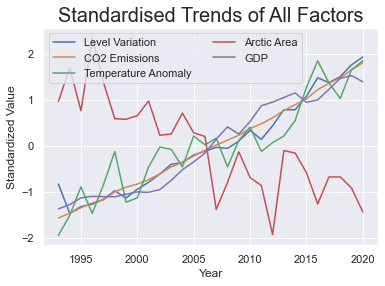

In [85]:

plt.plot(df_2.index, scaled_df_2.iloc[:, 0], label = 'Level Variation')
plt.plot(df_2.index, scaled_df_2.iloc[:, 1], label = 'CO2 Emissions')
plt.plot(df_2.index, scaled_df_2.iloc[:, 2], label = 'Temperature Anomaly')
plt.plot(df_2.index, scaled_df_2.iloc[:, 3], label = 'Arctic Area')
plt.plot(df_2.index, scaled_df_2.iloc[:, 4], label = 'GDP')
plt.legend(ncol = 2)
plt.xlabel('Year')
plt.ylabel('Standardized Value')
plt.title('Standardised Trends of All Factors', size = 20)
plt.savefig('Std_trends.png', dpi = 500)
plt.show()

In [86]:
a_i, b_i = np.polyfit(df_2.index, df_2['Arctic_Area'], deg = 1)
a_i, b_i

(-0.077025177887246, 158.40923371647332)

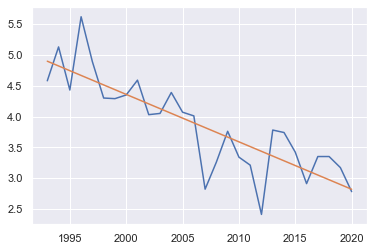

In [87]:
plt.plot(df_2.index, df_2['Arctic_Area'])
plt.plot(df_2.index, a_i * df_2.index + b_i)
plt.show()

In [88]:
range_of_val = []

for i in range(len(scaled_df_2.columns.values)):
    range_of_val.append(max(scaled_df_2.iloc[:, i]))
    range_of_val.append(min(scaled_df_2.iloc[:, i]))

In [89]:
max(range_of_val), min(range_of_val)

(2.3523948284766014, -1.9519246101586818)

In [90]:
a = []
b = []

for i in range(len(scaled_df_2.columns.values)):
    a.append(np.polyfit(df_2.index, scaled_df_2.iloc[:, i], deg = 1)[0])
    b.append(np.polyfit(df_2.index, scaled_df_2.iloc[:, i], deg = 1)[1])
    
trend_lines = []    
    
for i in range(len(scaled_df_2.columns.values)):    
    trend_lines.append(a[i] * df_2.index + b[i])

In [91]:
trend_line_values = pd.DataFrame(trend_lines).transpose()
trend_line_values.columns = ["Level_Rise'", "Emissions'", "Temp_Inc'", "Arctic_Area'", "GDP'"]

In [92]:
trend_line_values

,Level_Rise',Emissions',Temp_Inc',Arctic_Area',GDP'
0,-1.629261,-1.668015,-1.530777,1.388429,-1.633087
1,-1.508575,-1.544458,-1.417386,1.285582,-1.512117
2,-1.387889,-1.420902,-1.303995,1.182736,-1.391148
3,-1.267203,-1.297345,-1.190604,1.079889,-1.270178
4,-1.146517,-1.173788,-1.077214,0.977042,-1.149209
5,-1.025831,-1.050232,-0.963823,0.874196,-1.028240
6,-0.905145,-0.926675,-0.850432,0.771349,-0.907270
7,-0.784459,-0.803118,-0.737041,0.668503,-0.786301
8,-0.663773,-0.679562,-0.623650,0.565656,-0.665332
9,-0.543087,-0.556005,-0.510259,0.462810,-0.544362


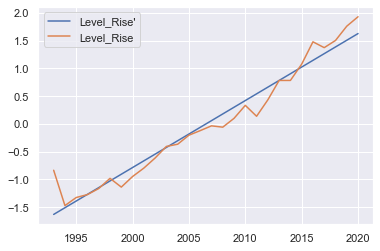

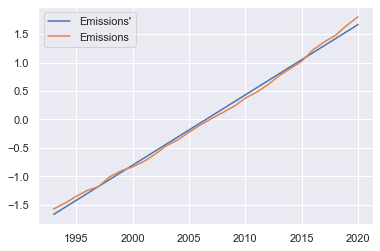

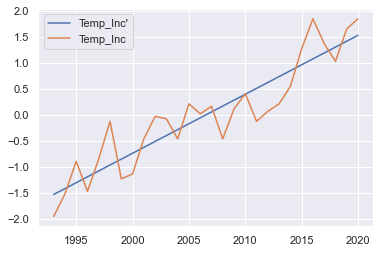

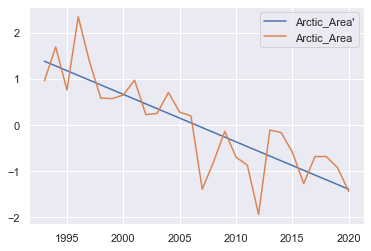

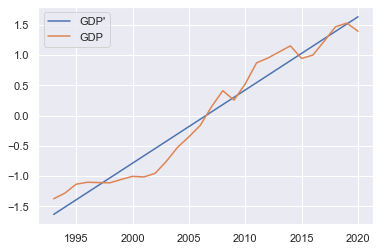

In [93]:
for i in range(len(trend_line_values.columns.values)):    
    plt.plot(df_2.index, trend_line_values.iloc[:, i], label = trend_line_values.columns.values[i])
    plt.plot(df_2.index, scaled_df_2.iloc[:, i], label = scaled_df_2.columns.values[i])
    plt.legend()
    plt.show()

In [94]:
arctic_area

,area
year,
1979,4.58
1980,4.87
1981,4.44
1982,4.43
1983,4.70
1984,4.11
1985,4.23
1986,4.72
1987,5.64


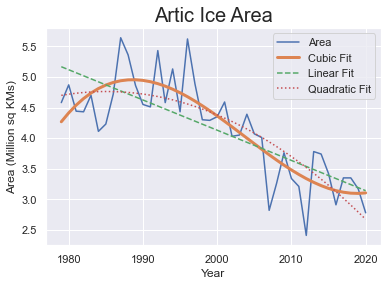

In [95]:
A__1, B__1, C__1, D = np.polyfit(arctic_area.index, arctic_area, 3)
A_1, B_1, C_1 = np.polyfit(arctic_area.index, arctic_area, 2)
A1, B1 = np.polyfit(arctic_area.index, arctic_area, deg = 1)
plt.plot(arctic_area.index, arctic_area, label = 'Area')
plt.plot(arctic_area.index, A__1 * arctic_area.index**3 + B__1 * arctic_area.index**2 + C__1 * arctic_area.index + D, lw = 3, label = 'Cubic Fit')
plt.plot(arctic_area.index, A1 * arctic_area.index + B1, ls = '--', label = 'Linear Fit')
plt.plot(arctic_area.index, A_1 * arctic_area.index**2 + B_1 * arctic_area.index + C_1, ls = ':', label = 'Quadratic Fit')
plt.xlabel('Year')
plt.ylabel('Area (Million sq KMs)')
plt.title('Artic Ice Area', size = 20)
plt.legend()
plt.savefig('AIA_.png', dpi = 500)
plt.show()

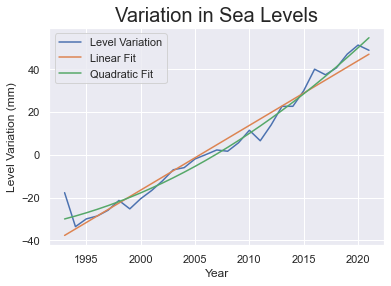

In [107]:
A_2, B_2, C_3 = np.polyfit(sea.index, sea, 2)
A2, B2 = np.polyfit(sea.index, sea, deg = 1)
plt.plot(sea.index, sea, label = 'Level Variation')
plt.plot(sea.index, A2 * sea.index + B2, label = 'Linear Fit')
plt.plot(sea.index, A_2 * sea.index**2 + B_2 * sea.index + C_3, label = 'Quadratic Fit')
plt.xlabel('Year')
plt.ylabel('Level Variation (mm)')
plt.title('Variation in Sea Levels', size = 20)
plt.legend()
plt.savefig('SV_.png', dpi = 500)
plt.show()

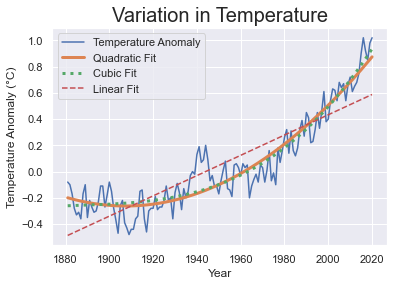

In [97]:
A__2, B__2, C__2, D__1 = np.polyfit(temp.index, temp, 3)
A_3, B_3, C_3 = np.polyfit(temp.index, temp, deg = 2)
A3, B3 = np.polyfit(temp.index, temp, deg = 1)
plt.plot(temp.index, temp, label = 'Temperature Anomaly')
plt.plot(temp.index, A_3 * (temp.index)**2 + B_3 * temp.index + C_3, lw = 3, label = 'Quadratic Fit')
plt.plot(temp.index, A__2 * temp.index**3 + B__2 * temp.index**2 + C__2 * temp.index + D__1, lw = 3, label = 'Cubic Fit', ls = ':')
plt.plot(temp.index, A3 * temp.index + B3, ls = '--', label = 'Linear Fit')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Variation in Temperature', size = 20)
plt.legend()
plt.savefig('TA_.png', dpi=500)
plt.show()

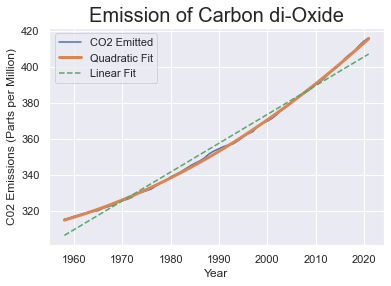

In [98]:
A_4, B_4, C_4 = np.polyfit(carbon.index, carbon, deg = 2)
A4, B4 = np.polyfit(carbon.index, carbon, deg = 1)
plt.plot(carbon.index, carbon, label = 'CO2 Emitted')
plt.plot(carbon.index, A_4 * (carbon.index)**2 + B_4 * carbon.index + C_4, lw = 3, label = 'Quadratic Fit')
plt.plot(carbon.index, A4 * carbon.index + B4, ls = '--', label = 'Linear Fit')
plt.xlabel('Year')
plt.ylabel('C02 Emissions (Parts per Million)')
plt.title('Emission of Carbon di-Oxide', size = 20)
plt.legend()
plt.savefig('CE_.png', dpi = 500)
plt.show()

In [99]:
gdp_list = pd.to_numeric(gdp.iloc[:, 0].values.tolist())
gdp_index = gdp.index.values.tolist()

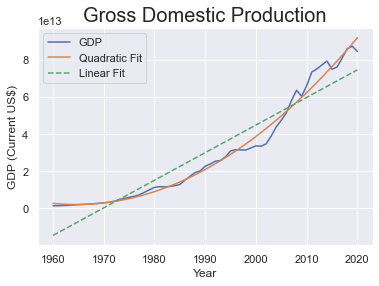

In [106]:
A_5, B_5, C_5 = np.polyfit(gdp_index, gdp_list, 2)
A5, B5 = np.polyfit(gdp_index, gdp_list, 1)
plt.plot(gdp_index, gdp_list, label = 'GDP')
plt.plot(gdp_index, A_5 * pd.DataFrame(gdp_index)**2 + B_5 * pd.DataFrame(gdp_index) + C_5, label = 'Quadratic Fit')
plt.plot(gdp_index, A5 * pd.DataFrame(gdp_index) + B5, ls = '--', label = 'Linear Fit')
plt.xlabel('Year')
plt.ylabel('GDP (Current US$)')
plt.title('Gross Domestic Production', size = 20)
plt.legend()
plt.savefig('GDP_.png', dpi = 500)
plt.show()

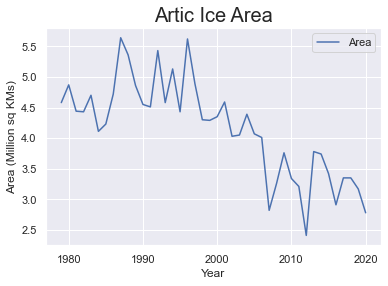

In [101]:
plt.plot(arctic_area.index, arctic_area, label = 'Area')
plt.xlabel('Year')
plt.ylabel('Area (Million sq KMs)')
plt.title('Artic Ice Area', size = 20)
plt.legend()
plt.savefig('AIA.png', dpi = 500)
plt.show()

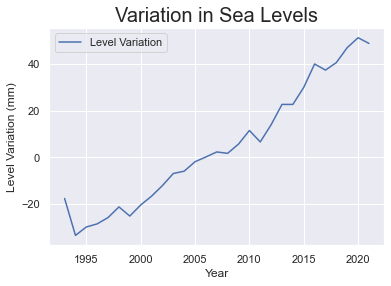

In [102]:
plt.plot(sea.index, sea, label = 'Level Variation')
plt.xlabel('Year')
plt.ylabel('Level Variation (mm)')
plt.title('Variation in Sea Levels', size = 20)
plt.legend()
plt.savefig('SV.png', dpi = 500)
plt.show()

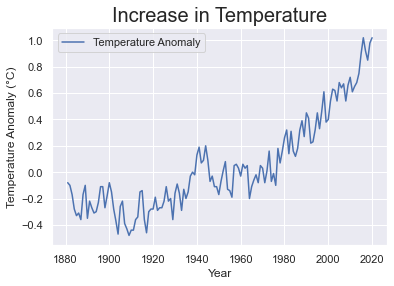

In [103]:
plt.plot(temp.index, temp, label = 'Temperature Anomaly')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Increase in Temperature', size = 20)
plt.legend()
plt.savefig('TA.png', dpi = 500)
plt.show()

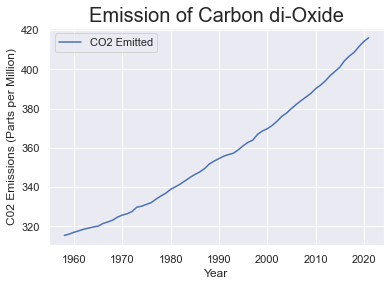

In [104]:
plt.plot(carbon.index, carbon, label = 'CO2 Emitted')
plt.xlabel('Year')
plt.ylabel('C02 Emissions (Parts per Million)')
plt.title('Emission of Carbon di-Oxide', size = 20)
plt.legend()
plt.savefig('CE.png', dpi = 500)
plt.show()

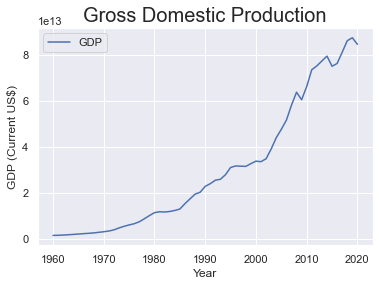

In [105]:
plt.plot(gdp_index, gdp_list, label = 'GDP')
plt.xlabel('Year')
plt.ylabel('GDP (Current US$)')
plt.title('Gross Domestic Production', size = 20)
plt.legend()
plt.savefig('GDP.png', dpi = 500)
plt.show()